In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns
%pylab inline
import requests, re
import pandas as pd
import seaborn as sns
import nltk

import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#  Part-1

In [3]:
# part1:
df1= pd.read_csv("filtered_reviews_part_1.csv")
df1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,T1iMdZeNzNRGB2SW_GYb-Q,Xy_6tT8l0Y5JNrSbL3_4uw,6PCHwjpYRMo1ZvY8m91bIg,3.0,1,0,0,If I were rating this place a few months ago i...,2015-12-29 22:09:28
1,y4GTzdMEgbMCnLSB3tvnMA,xUinwQIaC7G4B1OhrKJeOw,ALK-7tTvDKAzxAtIiNyh2A,5.0,0,0,0,Incredible food! Really unique combination of ...,2019-11-04 14:47:55
2,3yAQ2Chq47Dpap4nj-kUOg,pTdEM0c4El5cFwVAceLtNg,nqePY399khxYpBBpNjA_zw,5.0,0,0,0,A great local place to get great sandwiches. ...,2018-10-15 19:16:29
3,bs-cfyfjzQRTlT2RFsAHWw,jy9fiTWK-7liefYYkN4KnQ,h_d4fcmFsRFQYmvYaS2bzw,5.0,0,0,0,This is the real deal! I sat at the sushi bar...,2017-11-03 03:11:19
4,eZw0IfB9hYOjvigFX16Eeg,9sukFJd_IVRuDEv7MDHl6A,Cjb6F4tUM3B5Z7eV2lhfMg,5.0,0,0,0,Great neighborhood sushi place. Ask for the fa...,2015-05-18 00:34:33


In [4]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944894 entries, 0 to 944893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    944894 non-null  object 
 1   user_id      944894 non-null  object 
 2   business_id  944894 non-null  object 
 3   stars        944894 non-null  float64
 4   useful       944894 non-null  int64  
 5   funny        944894 non-null  int64  
 6   cool         944894 non-null  int64  
 7   text         944894 non-null  object 
 8   date         944894 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 64.9+ MB


In [5]:
avg_rating = df1['stars'].mean()
print(f"Average Rating: {avg_rating:.2f}")



review_counts = df1['business_id'].value_counts()
print(review_counts.head()) 

# Distribution of ratings
rating_distribution = df1['stars'].value_counts().sort_index()
print(rating_distribution)


Average Rating: 3.79
business_id
_ab50qdWOk0DdB6XOrBitw    1489
ac1AeYqs8Z4_e2X5M3if2A    1419
GXFMD0Z4jEVZBCsbPf4CTQ    1207
ytynqOUb3hjKeJfRj5Tshw    1138
iSRTaT9WngzB8JJ2YKJUig    1120
Name: count, dtype: int64
stars
1.0    113661
2.0     80587
3.0    108828
4.0    226249
5.0    415569
Name: count, dtype: int64


In [6]:
df1['date'] = pd.to_datetime(df1['date'])

reviews_per_month = df1.groupby(df1['date'].dt.to_period("M")).size()
print(reviews_per_month)
print(len(reviews_per_month))

date
2005-03      17
2005-04       6
2005-05      12
2005-06       6
2005-07      38
           ... 
2021-09    5978
2021-10    6703
2021-11    6063
2021-12    6480
2022-01    4167
Freq: M, Length: 203, dtype: int64
203


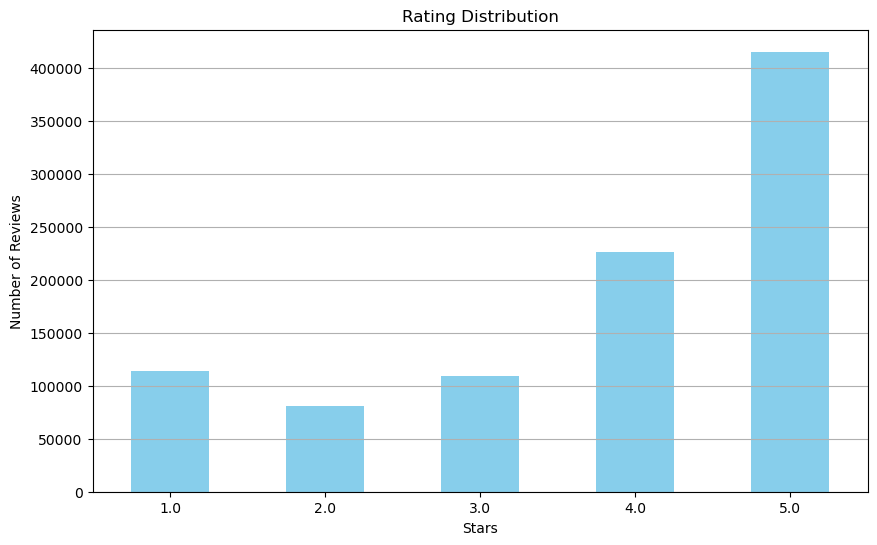

In [7]:
import matplotlib.pyplot as plt

rating_distribution = df1['stars'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10,6))
rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

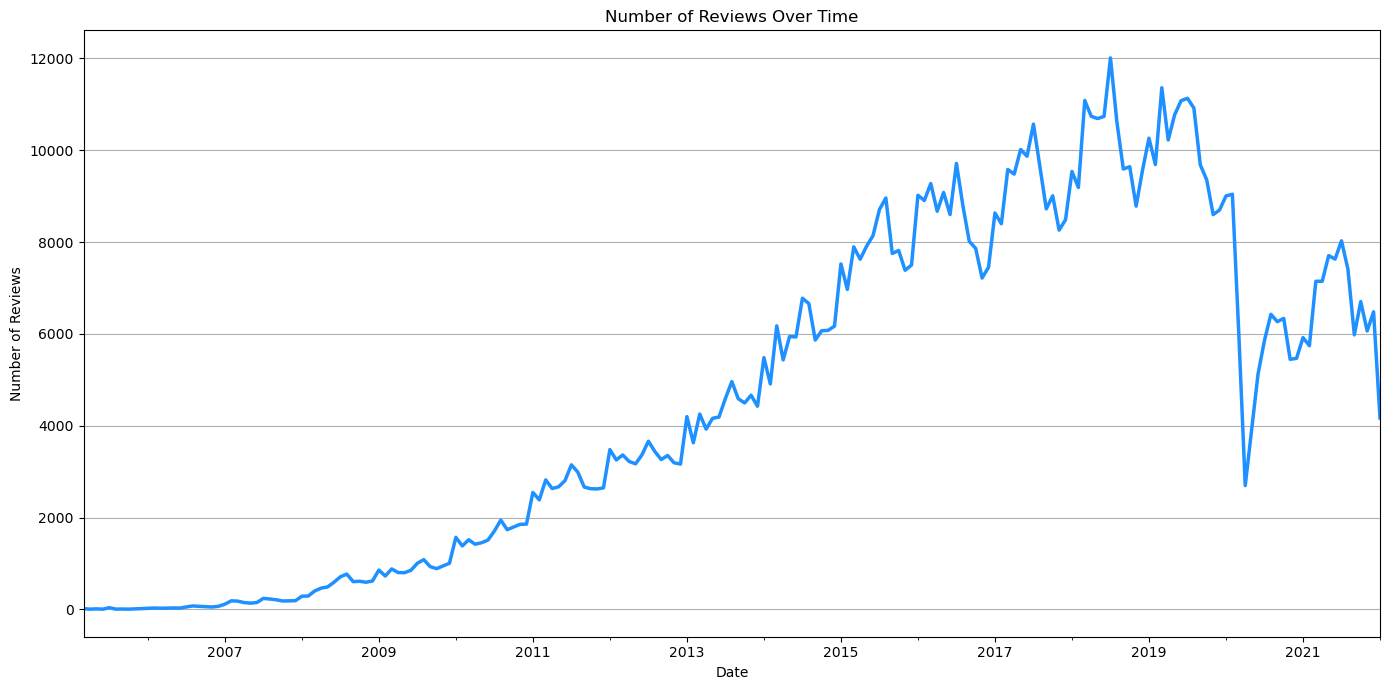

In [8]:
# Plotting
plt.figure(figsize=(14,7))
reviews_per_month.plot(color='dodgerblue', linewidth=2.5)
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [9]:
missing_values = df1.isnull().sum()
missing_values

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [10]:
duplicates = df1.duplicated().sum()
duplicates

0

In [11]:
# Investigate correlation between 'stars' rating and 'useful', 'funny', and 'cool' counts
correlations = df1[['stars', 'useful', 'funny', 'cool']].corr()
correlations


,stars,useful,funny,cool
stars,1.000000,-0.034815,-0.040748,0.058607
useful,-0.034815,1.000000,0.540908,0.843439
funny,-0.040748,0.540908,1.000000,0.562077
cool,0.058607,0.843439,0.562077,1.000000


In [12]:
import pandas as pd

# Calculate review length as the number of characters in the review
df1['review_length'] = df1['text'].str.len()

# Calculate word count as the number of words in the review
df1['word_count'] = df1['text'].str.split().str.len()



# Count reviews per business
business_review_counts = df1['business_id'].value_counts()

# Optionally, you can add this count back to the original DataFrame
df1['reviews_per_business'] = df1['business_id'].map(business_review_counts)

# Display the first few rows of the DataFrame with the new columns


In [32]:
df1.head()
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944894 entries, 0 to 944893
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   review_id             944894 non-null  object        
 1   user_id               944894 non-null  object        
 2   business_id           944894 non-null  object        
 3   stars                 944894 non-null  float64       
 4   useful                944894 non-null  int64         
 5   funny                 944894 non-null  int64         
 6   cool                  944894 non-null  int64         
 7   text                  944894 non-null  object        
 8   date                  944894 non-null  datetime64[ns]
 9   text_no_stop          944894 non-null  object        
 10  review_length         944894 non-null  int64         
 11  word_count            944894 non-null  int64         
 12  reviews_per_business  944894 non-null  int64         
dtyp

In [13]:
# Explore distribution of review lengths
review_length_distribution = df1['review_length'].describe()
review_length_distribution

count    944894.000000
mean        545.670296
std         505.080486
min           1.000000
25%         218.000000
50%         388.000000
75%         695.000000
max        5000.000000
Name: review_length, dtype: float64

In [14]:
print(df1[['review_length', 'word_count']].describe())


       review_length     word_count
count  944894.000000  944894.000000
mean      545.670296     100.416346
std       505.080486      93.327865
min         1.000000       1.000000
25%       218.000000      40.000000
50%       388.000000      71.000000
75%       695.000000     128.000000
max      5000.000000     994.000000


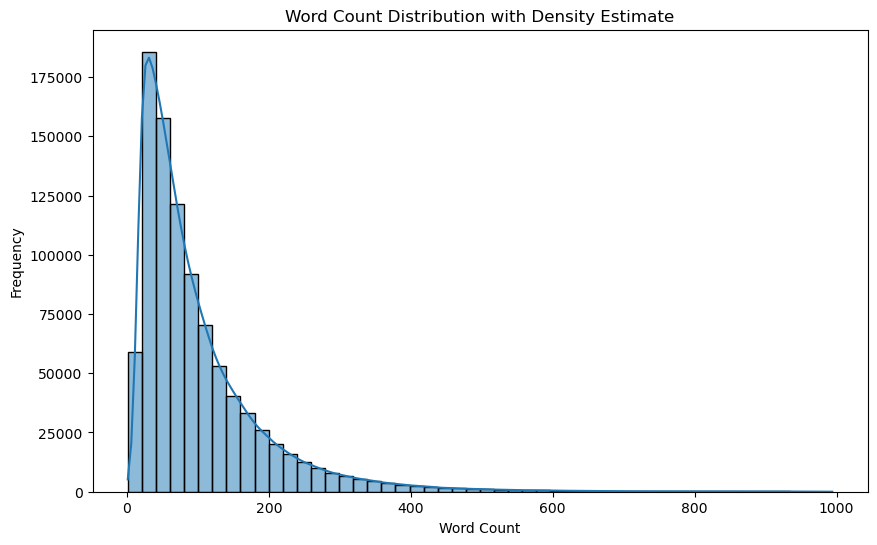

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df1['word_count'], kde=True, bins=50)
plt.title('Word Count Distribution with Density Estimate')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


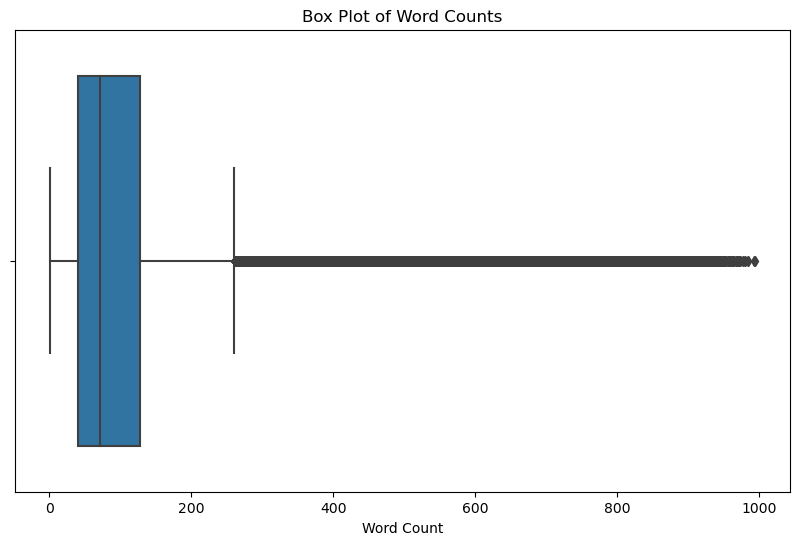

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['word_count'])
plt.title('Box Plot of Word Counts')
plt.xlabel('Word Count')
plt.show()


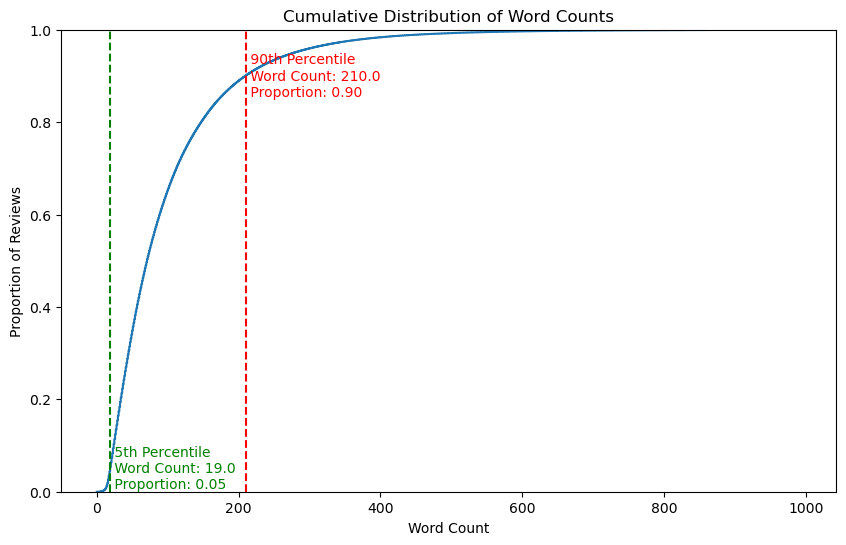

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the 90th percentile of word count
percentile_90 = df1['word_count'].quantile(0.90)

# Calculate the word count for the 5th percentile
percentile_5 = df1['word_count'].quantile(0.05)

# Plot the cumulative distribution
plt.figure(figsize=(10, 6))
sns.ecdfplot(df1['word_count'])
plt.axvline(x=percentile_90, color='red', linestyle='--')
plt.axvline(x=percentile_5, color='green', linestyle='--')

# Adding text annotations for the percentiles
plt.text(x=percentile_90, y=0.90, s=f" 90th Percentile\n Word Count: {percentile_90}\n Proportion: 0.90", 
         verticalalignment='center', color='red')
plt.text(x=percentile_5, y=0.05, s=f" 5th Percentile\n Word Count: {percentile_5}\n Proportion: 0.05", 
         verticalalignment='center', color='green')

plt.title('Cumulative Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Proportion of Reviews')
plt.show()


In [48]:
import pandas as pd

# Assuming df1 is your DataFrame
# Calculate the number of reviews per business
business_review_counts = df1['business_id'].value_counts()

# Calculate the 10th and 90th percentiles
low_threshold = business_review_counts.quantile(0.1)
high_threshold = business_review_counts.quantile(0.9)

# Count businesses with too few reviews (below 10th percentile)
too_few_reviews = (business_review_counts < low_threshold).sum()

# Count businesses with too many reviews (above 90th percentile)
too_many_reviews = (business_review_counts > high_threshold).sum()

print(f"Number of businesses with too few reviews (<10th percentile): {too_few_reviews}")
print(f"Number of businesses with too many reviews (>90th percentile): {too_many_reviews}")


Number of businesses with too few reviews (<10th percentile): 4770
Number of businesses with too many reviews (>90th percentile): 4877


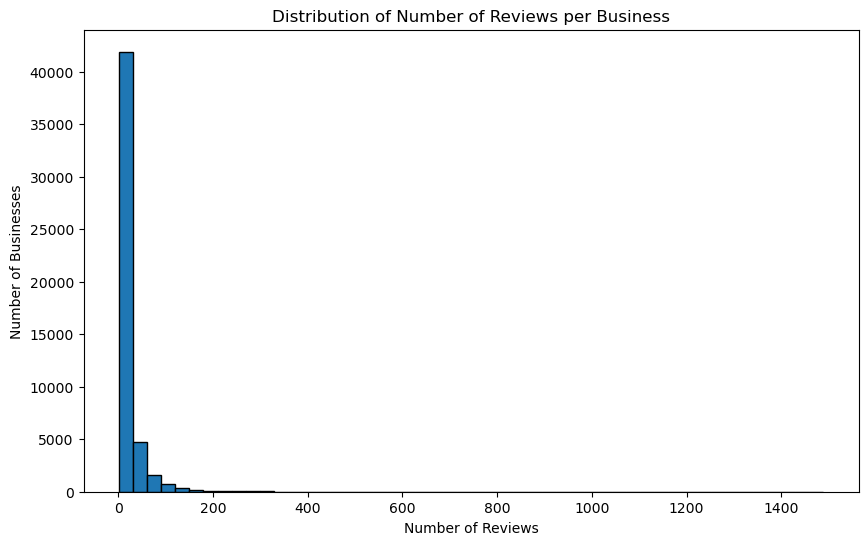

In [49]:
# Histogram of review counts per business
plt.figure(figsize=(10, 6))
plt.hist(business_review_counts, bins=50, edgecolor='black')
plt.title('Distribution of Number of Reviews per Business')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Businesses')
plt.show()


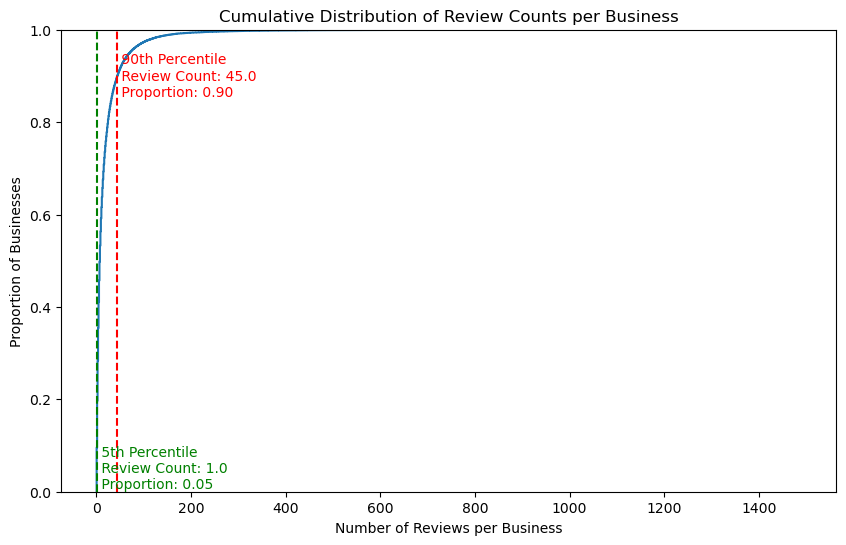

In [38]:
# Count the number of reviews per business
business_review_counts = df1['business_id'].value_counts()

# Calculate percentiles
percentile_5_reviews = business_review_counts.quantile(0.05)
percentile_90_reviews = business_review_counts.quantile(0.90)


plt.figure(figsize=(10, 6))
sns.ecdfplot(business_review_counts)
plt.axvline(x=percentile_5_reviews, color='green', linestyle='--')
plt.axvline(x=percentile_90_reviews, color='red', linestyle='--')

# Adding text annotations for the percentiles
plt.text(x=percentile_5_reviews, y=0.05, s=f" 5th Percentile\n Review Count: {percentile_5_reviews}\n Proportion: 0.05", 
         verticalalignment='center', color='green')
plt.text(x=percentile_90_reviews, y=0.90, s=f" 90th Percentile\n Review Count: {percentile_90_reviews}\n Proportion: 0.90", 
         verticalalignment='center', color='red')

plt.title('Cumulative Distribution of Review Counts per Business')
plt.xlabel('Number of Reviews per Business')
plt.ylabel('Proportion of Businesses')
plt.show()


In [80]:
#filtered_df.to_csv('df1_filtered_15_wed.csv', index=False)

#df1.to_csv('df1_cleaned.csv', index=False)

In [17]:
# Setting thresholds based on analysis
min_length_threshold = df1['review_length'].quantile(0.1)  # 10th percentile
max_length_threshold = df1['review_length'].quantile(0.9)  # 90th percentile
min_word_count_threshold = df1['word_count'].quantile(0.1)  # 10th percentile
max_word_count_threshold = df1['word_count'].quantile(0.9)  # 90th percentile

# Count the number of reviews per business and set thresholds
business_review_counts = df1['business_id'].value_counts()
min_reviews_per_business_threshold = business_review_counts.quantile(0.1)  # 10th percentile
max_reviews_per_business_threshold = business_review_counts.quantile(0.9)  # 90th percentile

# Identify businesses that meet the review count thresholds
filtered_business_ids = business_review_counts[(business_review_counts >= min_reviews_per_business_threshold) &
                                               (business_review_counts <= max_reviews_per_business_threshold)].index

# Filtering the data
filtered_df = df1[(df1['review_length'] >= min_length_threshold) & 
                  (df1['review_length'] <= max_length_threshold) &
                  (df1['word_count'] >= min_word_count_threshold) &
                  (df1['word_count'] <= max_word_count_threshold) &
                  (df1['business_id'].isin(filtered_business_ids))]

print("\nAfter applying thresholds:")
print(filtered_df.info())


After applying thresholds:
<class 'pandas.core.frame.DataFrame'>
Index: 367090 entries, 2 to 944890
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   review_id             367090 non-null  object        
 1   user_id               367090 non-null  object        
 2   business_id           367090 non-null  object        
 3   stars                 367090 non-null  float64       
 4   useful                367090 non-null  int64         
 5   funny                 367090 non-null  int64         
 6   cool                  367090 non-null  int64         
 7   text                  367090 non-null  object        
 8   date                  367090 non-null  datetime64[ns]
 9   review_length         367090 non-null  int64         
 10  word_count            367090 non-null  int64         
 11  reviews_per_business  367090 non-null  int64         
dtypes: datetime64[ns](1), float64(1), i

In [18]:
# Resetting the index of the filtered DataFrame
filtered_df = filtered_df.reset_index(drop=True)

# Display the first few rows of the DataFrame with the reset index
filtered_df.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_length,word_count,reviews_per_business
0,3yAQ2Chq47Dpap4nj-kUOg,pTdEM0c4El5cFwVAceLtNg,nqePY399khxYpBBpNjA_zw,5.0,0,0,0,A great local place to get great sandwiches. ...,2018-10-15 19:16:29,161,30,31
1,DBspYYqiKuG7SjWbsLbA7Q,BekK0zyjU4UJIrm3S_zVmA,OPQWnVzSu70iE26LOaZiJw,1.0,0,0,0,great drink but while i was trying to sit and ...,2018-08-10 19:05:15,185,31,41
2,PGLMbbv2AM_PxGogHrOVyw,Y4MrjmWKKUqvO3NyYBQnCg,oRQKEVR6uNlV8jnUAaPgpg,2.0,1,0,0,"The place is very nice inside, however our tab...",2012-07-18 14:50:37,361,70,45
3,qXjvlSGsQ3yv9WgP6_anPw,rUQRgLS4hhLuqaOBd0IYXQ,FDifzPPJA9aZKxNQo61pfQ,4.0,0,0,0,"I've been to multiple Green Eggs locations, an...",2019-07-21 21:37:56,747,137,18
4,1OyWGBjqOyBPt8yarVrd0A,e-ZAcXiRj9Lq9g8TqqMuMg,2jsjjTif9xrMrTe_89hkTw,5.0,0,0,0,What a hidden little gem. It is such an adorab...,2014-06-25 07:17:12,1078,194,29


The evaluation metrics include accuracy (the proportion of correctly predicted ratings), precision (the proportion of positive identifications that were actually correct), recall (the proportion of actual positives that were identified correctly), and the F1 score (the harmonic mean of precision and recall).

In [54]:
import pandas as pd
from langdetect import detect
from concurrent.futures import ThreadPoolExecutor

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Function to apply language detection in parallel

def parallel_apply(df, func, column_name, num_workers=4):
    with ThreadPoolExecutor(max_workers=num_workers) as executor:
        results = list(executor.map(func, df[column_name]))
    return results

# Apply the function in parallel
is_english_results = parallel_apply(filtered_df, is_english, 'text_no_stop')



In [55]:
# Add results to DataFrame and filter
filtered_df['is_english'] = is_english_results
df1_filtered = filtered_df[filtered_df['is_english']]

print(df1_filtered.info())


<class 'pandas.core.frame.DataFrame'>
Index: 365837 entries, 0 to 367355
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   review_id             365837 non-null  object        
 1   user_id               365837 non-null  object        
 2   business_id           365837 non-null  object        
 3   stars                 365837 non-null  float64       
 4   useful                365837 non-null  int64         
 5   funny                 365837 non-null  int64         
 6   cool                  365837 non-null  int64         
 7   text                  365837 non-null  object        
 8   date                  365837 non-null  datetime64[ns]
 9   text_no_stop          365837 non-null  object        
 10  review_length         365837 non-null  int64         
 11  word_count            365837 non-null  int64         
 12  reviews_per_business  365837 non-null  int64         
 13  is_e

# Used this file for EDA of EDA_on_reviews_between_10_to_90_bin

In [22]:

#df1_filtered.to_csv('16_Nov_cleaned_eng.csv', index=False)


In [23]:
df1_filtered= pd.read_csv('16_Nov_cleaned_eng.csv')
print(df1_filtered.info())
df1_filtered.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365842 entries, 0 to 365841
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   review_id             365842 non-null  object 
 1   user_id               365839 non-null  object 
 2   business_id           365839 non-null  object 
 3   stars                 365839 non-null  float64
 4   useful                365839 non-null  float64
 5   funny                 365839 non-null  float64
 6   cool                  365839 non-null  object 
 7   text                  365837 non-null  object 
 8   date                  365835 non-null  object 
 9   text_no_stop          365835 non-null  object 
 10  review_length         365835 non-null  float64
 11  word_count            365835 non-null  float64
 12  reviews_per_business  365835 non-null  float64
 13  is_english            365835 non-null  object 
dtypes: float64(6), object(8)
memory usage: 39.1+ MB
None

/var/folders/5j/qcfnms155kq9pk31c0zqlhp80000gn/T/ipykernel_5972/351522599.py:1: DtypeWarning: Columns (6,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df1_filtered= pd.read_csv('16_Nov_cleaned_eng.csv')


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_no_stop,review_length,word_count,reviews_per_business,is_english
0,3yAQ2Chq47Dpap4nj-kUOg,pTdEM0c4El5cFwVAceLtNg,nqePY399khxYpBBpNjA_zw,5.0,0.0,0.0,0,a great local place to get great sandwiches ...,2018-10-15 19:16:29,great local place get great sandwiches may act...,157.0,30.0,31.0,True
1,DBspYYqiKuG7SjWbsLbA7Q,BekK0zyjU4UJIrm3S_zVmA,OPQWnVzSu70iE26LOaZiJw,1.0,0.0,0.0,0,great drink but while i was trying to sit and ...,2018-08-10 19:05:15,great drink trying sit read staff inappropriat...,182.0,31.0,41.0,True
2,PGLMbbv2AM_PxGogHrOVyw,Y4MrjmWKKUqvO3NyYBQnCg,oRQKEVR6uNlV8jnUAaPgpg,2.0,1.0,0.0,0,the place is very nice inside however our tabl...,2012-07-18 14:50:37,place nice inside however table shaky asked ge...,351.0,70.0,45.0,True
3,qXjvlSGsQ3yv9WgP6_anPw,rUQRgLS4hhLuqaOBd0IYXQ,FDifzPPJA9aZKxNQo61pfQ,4.0,0.0,0.0,0,ive been to multiple green eggs locations and ...,2019-07-21 21:37:56,ive multiple green eggs locations food always ...,720.0,136.0,18.0,True
4,1OyWGBjqOyBPt8yarVrd0A,e-ZAcXiRj9Lq9g8TqqMuMg,2jsjjTif9xrMrTe_89hkTw,5.0,0.0,0.0,0,what a hidden little gem it is such an adorabl...,2014-06-25 07:17:12,hidden little gem adorable little place inviti...,1046.0,194.0,29.0,True


In [66]:
df1_filtered.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_no_stop,review_length,word_count,reviews_per_business,is_english
0,3yAQ2Chq47Dpap4nj-kUOg,pTdEM0c4El5cFwVAceLtNg,nqePY399khxYpBBpNjA_zw,5.0,0,0,0,a great local place to get great sandwiches ...,2018-10-15 19:16:29,great local place get great sandwiches may act...,157,30,31,True
1,DBspYYqiKuG7SjWbsLbA7Q,BekK0zyjU4UJIrm3S_zVmA,OPQWnVzSu70iE26LOaZiJw,1.0,0,0,0,great drink but while i was trying to sit and ...,2018-08-10 19:05:15,great drink trying sit read staff inappropriat...,182,31,41,True
2,PGLMbbv2AM_PxGogHrOVyw,Y4MrjmWKKUqvO3NyYBQnCg,oRQKEVR6uNlV8jnUAaPgpg,2.0,1,0,0,the place is very nice inside however our tabl...,2012-07-18 14:50:37,place nice inside however table shaky asked ge...,351,70,45,True
3,qXjvlSGsQ3yv9WgP6_anPw,rUQRgLS4hhLuqaOBd0IYXQ,FDifzPPJA9aZKxNQo61pfQ,4.0,0,0,0,ive been to multiple green eggs locations and ...,2019-07-21 21:37:56,ive multiple green eggs locations food always ...,720,136,18,True
4,1OyWGBjqOyBPt8yarVrd0A,e-ZAcXiRj9Lq9g8TqqMuMg,2jsjjTif9xrMrTe_89hkTw,5.0,0,0,0,what a hidden little gem it is such an adorabl...,2014-06-25 07:17:12,hidden little gem adorable little place inviti...,1046,194,29,True


In [56]:
import spacy
from collections import Counter

# Load spaCy's English language model with unnecessary components disabled
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Iterating over star ratings
for star in range(1, 6):
    # Convert DataFrame column to a list for more efficient processing
    reviews = df1_filtered[df1_filtered['stars'] == star]['text'].tolist()
    all_nouns = []

    # Process reviews in batches using nlp.pipe
    for doc in nlp.pipe(reviews, batch_size=50):
        all_nouns.extend([token.lemma_.lower() for token in doc if token.pos_ in ['NOUN'] and not token.is_stop and token.is_alpha])

    # Count the frequency of each noun
    noun_freq = Counter(all_nouns)

    # Display the 10 most common nouns
    print(f"\nTop 10 nouns for {star} star reviews:")
    for noun, freq in noun_freq.most_common(10):
        print(f"{noun}: {freq}")



Top 10 nouns for 1 star reviews:
food: 98094
time: 56717
place: 56390
service: 47571
order: 44814
minute: 37090
restaurant: 34513
table: 32789
customer: 24648
manager: 22504

Top 10 nouns for 2 star reviews:
food: 76766
place: 45310
time: 40897
service: 35471
restaurant: 24840
table: 23526
order: 21913
minute: 18714
chicken: 17348
drink: 16531

Top 10 nouns for 3 star reviews:
food: 92862
place: 64591
time: 47016
service: 44435
restaurant: 30852
table: 24977
menu: 24298
chicken: 23705
drink: 20226
bar: 19494

Top 10 nouns for 4 star reviews:
food: 155646
place: 130374
time: 84154
service: 75608
restaurant: 54423
menu: 49316
chicken: 45607
table: 37892
bar: 36688
sauce: 36155

Top 10 nouns for 5 star reviews:
food: 266468
place: 223454
service: 131715
time: 124013
restaurant: 91185
staff: 67083
menu: 65679
chicken: 60718
pizza: 53549
meal: 49587


In [ ]:
# five_star_reviews = df1[df1['stars'] == 5]['text']


# stop_words = set(stopwords.words('english'))


# def process_review(review):
   
#     words = word_tokenize(review)
#     words = [word for word in words if len(word) > 1]
#     words = [word for word in words if not word.isnumeric()]
#     words = [word.lower() for word in words]
#     words = [word for word in words if word not in stop_words]
#     return words


# all_words = []
# for review in five_star_reviews:
#     all_words.extend(process_review(review))


# nouns = [word for word, pos in pos_tag(all_words) if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
# word_freq = Counter(nouns)

# # Display the 10 most common nouns (aspects)
# for word, freq in word_freq.most_common(10):
#     print(f"{word}: {freq}")
    
# food: 264717
# place: 192528
# service: 129678
# time: 98569
# staff: 67379
# restaurant: 58665
# everything: 54316
# order: 52408
# menu: 46016
# chicken: 41023

In [61]:
len(all_nouns)

7039776

In [69]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1_filtered['text'],
                                    df1_filtered['stars'], test_size=0.25, random_state=42)

# Train a Naive Bayes classifier
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = nb_model.predict(X_test_vectorized)
evaluation_metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro'),
    'f1_score': f1_score(y_test, y_pred, average='macro')
}

# Print evaluation metrics
for metric, value in evaluation_metrics.items():
    print(f'{metric}: {value:.4f}')



accuracy: 0.6364
precision: 0.5569
recall: 0.5470
f1_score: 0.5479
